In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Akhil/Desktop/ASSIGNMENTS/Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
dataset = df.iloc[:,2]
dataset

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [7]:
A=dataset.values
A

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [8]:
B = pd.cut(A,[10003,30000,99619],labels=["Risky","Good"])
B

['Good', 'Good', 'Good', 'Good', 'Good', ..., 'Good', 'Good', 'Good', 'Good', 'Good']
Length: 600
Categories (2, object): ['Risky' < 'Good']

In [9]:
B.value_counts()

Risky    123
Good     476
dtype: int64

In [18]:
C = pd.DataFrame(B,columns=["TaxableIncome1"])
C.isna().value_counts()

TaxableIncome1
False             599
True                1
dtype: int64

<AxesSubplot:>

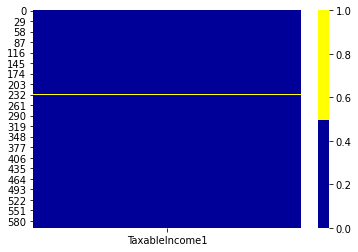

In [21]:
colors = ['#000099','#ffff00']
sns.heatmap(C.isnull(),cmap=sns.color_palette(colors))

In [22]:
C[C.isnull().any(axis=1)]

,TaxableIncome1
233,NaN


In [23]:
D = pd.concat([df,C],axis=1)
D

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxableIncome1
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [24]:
E = D.drop("Taxable.Income",axis=1)
E

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxableIncome1
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [25]:
F = E.dropna()
F

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxableIncome1
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [26]:
F.isna().value_counts()

Undergrad  Marital.Status  City.Population  Work.Experience  Urban  TaxableIncome1
False      False           False            False            False  False             599
dtype: int64

In [28]:
X1 = F.iloc[:,0:5]
X1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [29]:
Y = F.iloc[:,-1]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxableIncome1, Length: 599, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [30]:
Z = X1.iloc[:,[0,1,4]]
Z

,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO
...,...,...,...
595,YES,Divorced,YES
596,YES,Divorced,YES
597,NO,Divorced,YES
598,YES,Married,NO


In [31]:
IN = Z.apply(preprocessing.LabelEncoder().fit_transform)
IN

,Undergrad,Marital.Status,Urban
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0
...,...,...,...
595,1,0,1
596,1,0,1
597,0,0,1
598,1,1,0


In [32]:
X2 = X1.drop(["Undergrad","Marital.Status","Urban"],axis=1)
X2

,City.Population,Work.Experience
0,50047,10
1,134075,18
2,160205,30
3,193264,15
4,27533,28
...,...,...
595,39492,7
596,55369,2
597,154058,0
598,180083,17


In [33]:
X = pd.concat([X2,IN],axis=1)
X

,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,50047,10,0,2,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,2,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [34]:
x = X.values
x

array([[ 50047,     10,      0,      2,      1],
       [134075,     18,      1,      0,      1],
       [160205,     30,      0,      1,      1],
       ...,
       [154058,      0,      0,      0,      1],
       [180083,     17,      1,      1,      0],
       [158137,     16,      0,      0,      0]], dtype=int64)

In [35]:
y = Y.values
y

['Good', 'Good', 'Good', 'Good', 'Good', ..., 'Good', 'Good', 'Good', 'Good', 'Good']
Length: 599
Categories (2, object): ['Risky' < 'Good']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [37]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(181.35000000000002, 190.26, 'X[0] <= 74597.0\nentropy = 0.719\nsamples = 479\nvalue = [384, 95]'),
 Text(111.60000000000001, 135.9, 'X[0] <= 39943.0\nentropy = 0.584\nsamples = 143\nvalue = [123, 20]'),
 Text(55.800000000000004, 81.53999999999999, 'X[1] <= 24.5\nentropy = 0.764\nsamples = 45\nvalue = [35, 10]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.852\nsamples = 36\nvalue = [26, 10]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(167.4, 81.53999999999999, 'X[0] <= 44513.0\nentropy = 0.475\nsamples = 98\nvalue = [88, 10]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.523\nsamples = 85\nvalue = [75, 10]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 0.5\nentropy = 0.766\nsamples = 336\nvalue = [261, 75]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(279.0, 81.53999999999999, 'X[0] <= 14

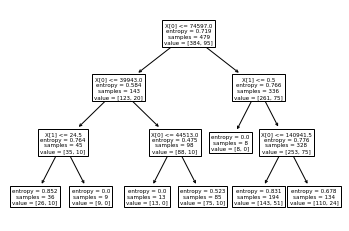

In [38]:
tree.plot_tree(model)

In [39]:
from sklearn.tree import plot_tree

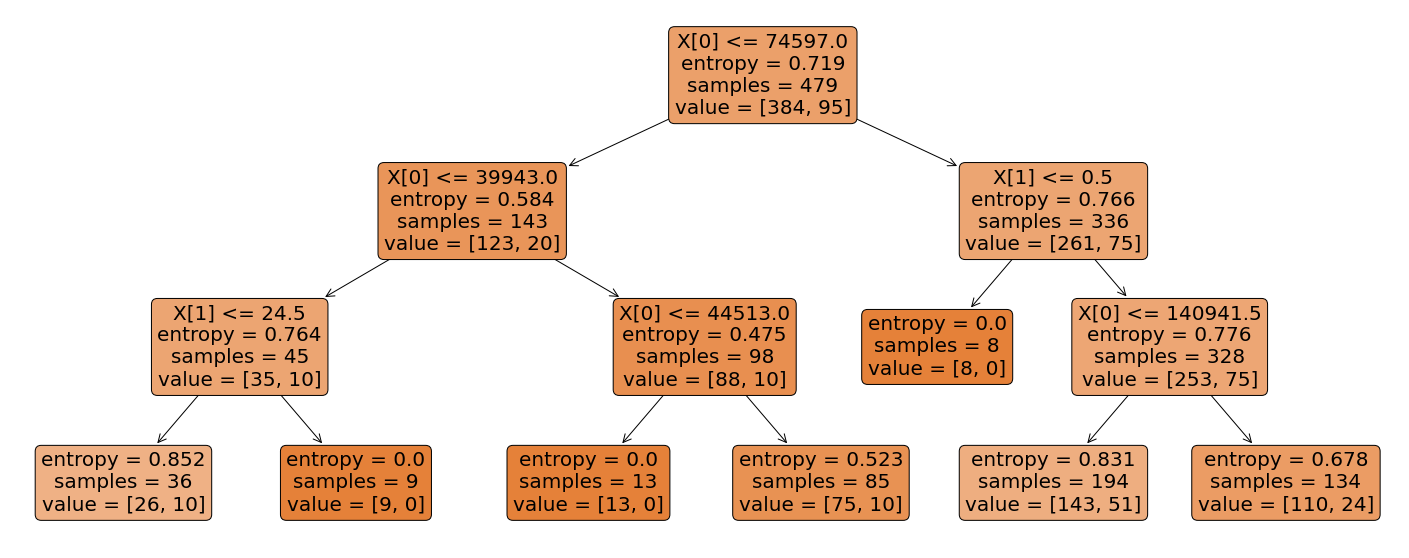

In [40]:
plt.figure(figsize=(25,10))
a = plot_tree(model,filled=True,rounded=True,fontsize=20)

In [41]:
preds = model.predict(x_test)
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [42]:
pd.Series(preds).value_counts()

Good    120
dtype: int64

In [43]:
np.mean(preds==y_test)

0.7666666666666667

In [44]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        Good       1.00      0.77      0.87       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
